<div style="text-align: center;">
  <img src="Logo vue donnée.png" alt="Logo" style="width: 200px;"/>
</div>

# 🛍️ E-commerce Sales Analysis — 2023 Report

**Author:** *Thomas Amblard, Vue donnée*  
**Date:** *May 2025*  
**Tools:** Python · Pandas · Seaborn · Matplotlib · Jupyter Notebook

---

## 📘 Project Overview

This project demonstrates a full data analysis workflow on a raw e-commerce sales dataset.  
It includes:

- Data cleaning (formatting, corrections, type conversions)
- Feature engineering (monthly revenue, product performance)
- KPI analysis (top products, regional sales, seasonal trends)
- Visualizations ready for presentation
- Strategic business insights

---

## 🎯 Objective

To extract actionable business insights from real-world messy data by:

- Cleaning and structuring the dataset
- Identifying sales trends by product, time, and region
- Delivering clear, visual, and data-driven recommendations

---

## 📚 Table of Contents
- 1. Data Cleaning & Preparation
- 2. KPI Aggregations
- 3. Visualizations
- 4. Project Summary & Business Insights

---

> 💡 This notebook is designed to be client-ready, visually clean, and exportable as PDF or HTML.

<div style="page-break-after: always;"></div>

### 1. Import + Chargement + Nettoyage

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement
df = pd.read_csv("sales_data_dirty.csv")

# Renommage propre des colonnes
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Nettoyage de base
df.drop_duplicates(inplace=True)
df.replace(['N/A', 'None', 'none', 'null'], pd.NA, inplace=True)
df.dropna(inplace=True)

# Dates
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df.dropna(subset=['order_date'], inplace=True)

# Nettoyage texte
df['region'] = df['region'].str.strip().str.capitalize()
df['product'] = df['product'].str.strip().str.capitalize()

# Correction des fautes de région
df['region'] = df['region'].replace({
    'Pariss': 'Paris',
    'Marseile': 'Marseille',
    'Toulose': 'Toulouse',
    'Lill': 'Lille'
})

# Types numériques + création colonnes
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['qty', 'price'], inplace=True)
df['montant'] = df['qty'] * df['price']
df["mois"] = df["order_date"].dt.to_period("M").astype(str)


<div style="page-break-after: always;"></div>

### 2. KPI Aggregations

In [25]:
top_produits = df.groupby("product")["qty"].sum().sort_values(ascending=False).head(5)
ventes_mensuelles = df.groupby("mois")["montant"].sum()
regions = df.groupby("region")["montant"].sum().sort_values(ascending=False)

<div style="page-break-after: always;"></div>

### 3. Visualisations (avec sauvegarde)

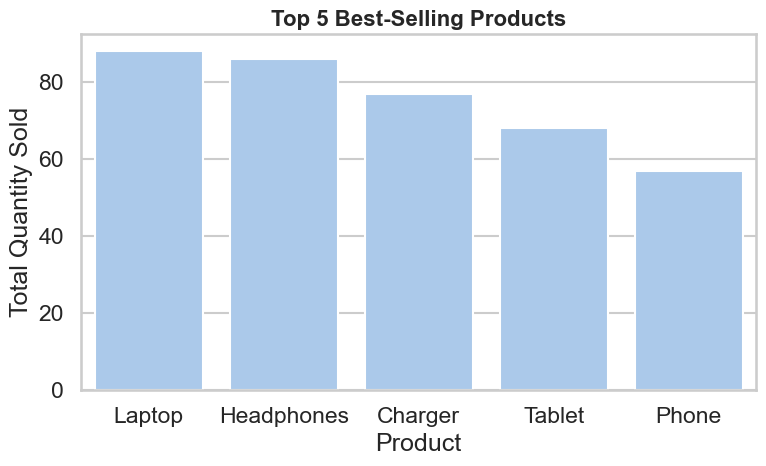

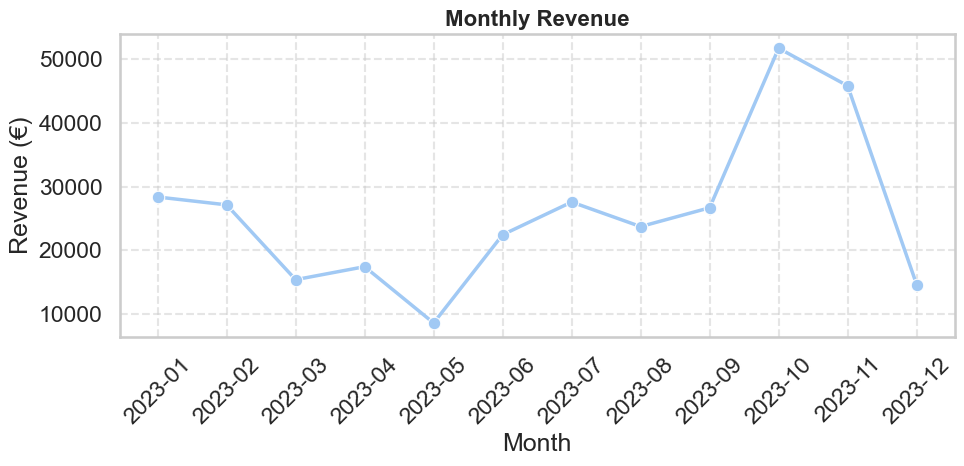

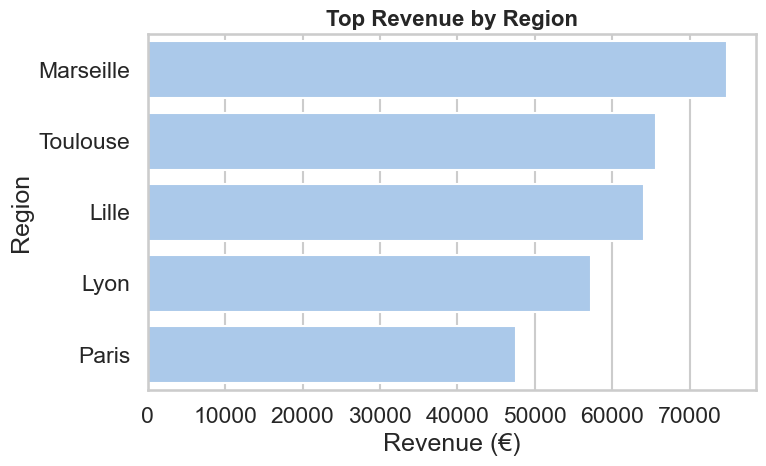

In [26]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)
sns.set_context("talk")

# Top produits
plt.figure(figsize=(8, 5))
sns.barplot(x=top_produits.index, y=top_produits.values)
plt.title("Top 5 Best-Selling Products", fontsize=16, weight='bold')
plt.ylabel("Total Quantity Sold")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("Top_5_Best-Selling_Products.png", dpi=300, bbox_inches='tight')
plt.show()

# Revenus mensuels
plt.figure(figsize=(10, 5))
sns.lineplot(x=ventes_mensuelles.index, y=ventes_mensuelles.values, marker='o', linewidth=2.5)
plt.title("Monthly Revenue", fontsize=16, weight='bold')
plt.ylabel("Revenue (€)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("monthly_revenue.png", dpi=300, bbox_inches='tight')
plt.show()

# Régions rentables
plt.figure(figsize=(8, 5))
sns.barplot(x=regions.values, y=regions.index, orient='h')
plt.title("Top Revenue by Region", fontsize=16, weight='bold')
plt.xlabel("Revenue (€)")
plt.ylabel("Region")
plt.tight_layout()
plt.savefig("regions_revenue.png", dpi=300, bbox_inches='tight')
plt.show()


<div style="page-break-after: always;"></div>

### 📌 Project Summary & Business Insights (with Visuals)

#### ✅ Data Cleaning & Preparation

This project started with a raw e-commerce dataset containing typical issues:
- Inconsistent column names
- Duplicated rows
- Missing or invalid values (None, N/A, text like 'three')
- Misspelled product and region names ("Toulose" vs "Toulouse", "Pariss" vs "Paris")
- Mixed date formats

Key cleaning steps included:
- Renaming and standardizing column headers
- Removing duplicates and handling missing data
- Converting dates into datetime format
- Standardizing product and region names
- Creating derived columns: montant (revenue) and mois (month)

The dataset is now fully cleaned, structured, and analysis-ready.

---

#### 📊 KPI Analysis & Visual Insights

**1. Top-Selling Products**

<img src="Top_5_Best-Selling_Products.png" width="600"/>

The **Laptop** is the top-selling product with **88 units**, followed closely by **Headphones (86)** and **Chargers (77)**.  
These are clear revenue drivers and should be prioritized in marketing and inventory planning.

---

**2. Monthly Revenue Trend**

<img src="monthly_revenue.png" width="600"/>

Sales peak in **October (€51,771)** and **November (€45,853)**, with a solid start in **January (€28,365)**.  
This indicates a strong **Q4 seasonality**, and some post-holiday activity in early Q1.

---

**3. Most Profitable Regions**

<img src="regions_revenue.png" width="600"/>

Top regions by revenue are:
- **Marseille** – €74,826
- **Toulouse** – €65,637
- **Lille** – €64,111

These regions show strong buying power and should be prioritized in **regional marketing strategies**.

---

#### 💡 Final Recommendations

- 🛒 Focus on **Laptops, Headphones, and Chargers** — the most sold products — for promotions and stock management.
- 📆 Prepare for strong **Q4 sales**, especially October and November. Adjust inventory and campaigns accordingly.
- 📍 Leverage high-performing regions like **Marseille, Toulouse, and Lille** with tailored regional marketing.
- 🧹 Maintain strong data hygiene: standardizing entries like region names is essential for reliable KPIs.
- 📈 The full pipeline — from messy raw data to clear strategic insights — is now complete and fully reproducible in Python.

---

✅ This notebook provides a clean, visual, and strategic overview — ready for client presentation or business decision-making.